<a href="https://colab.research.google.com/github/yuki-tamaribuchi/stats_code_kata/blob/master/boston_my_process_20210309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
data=load_boston()

In [ ]:
X_df=pd.DataFrame(data=data.data,columns=data.feature_names)
y_df=pd.DataFrame(data=data.target,columns=['MEDV'])

all_df=pd.concat([X_df,y_df],axis=1)

In [ ]:
all_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
all_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




        CRIM per capita crime rate by town
        人口1人あたりの犯罪の発生率

        ZN proportion of residential land zoned for lots over 25,000 sq.ft.
        25,000 平方フィート以上の住居区画の占める割合

        INDUS proportion of non-retail business acres per town
        小売業以外の商業が占める面積の割合

        CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        チャールズ川によるダミー変数(1: 川の周辺, 0: それ以外)

        NOX nitric oxides concentration (parts per 10 million)
        窒素酸化物の濃度

        RM average number of rooms per dwelling
        住居の平均部屋数

        AGE proportion of owner-occupied units built prior to 1940
        1940 年より前に建てられた物件の割合

        DIS weighted distances to five Boston employment centres
        5つのボストン市の雇用施設からの距離

        RAD index of accessibility to radial highways
        環状高速道路へのアクセスしやすさの指数

        TAX full-value property-tax rate per $10,000
        $10,000 ドルあたりの固定資産税率の総計

        PTRATIO pupil-teacher ratio by town
        町毎の児童と教師の比率

        B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2

        LSTAT % lower status of the population
        給与の低い職業に従事する人口の割合 (%)

        MEDV Median value of owner-occupied homes in $1000’s
        所有者が占有している家屋の$ 1000単位の中央値




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


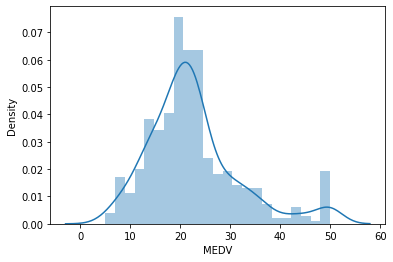

In [ ]:
sns.distplot(all_df['MEDV'])

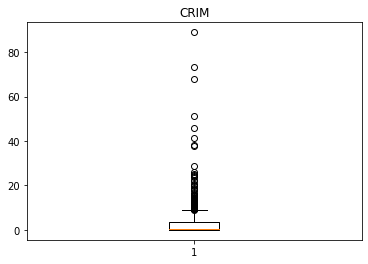

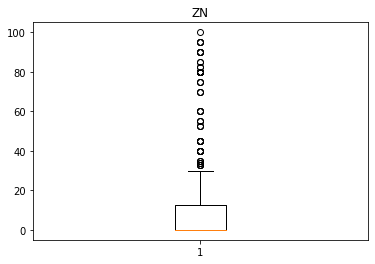

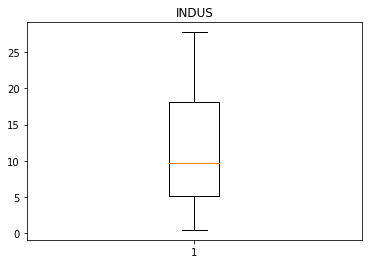

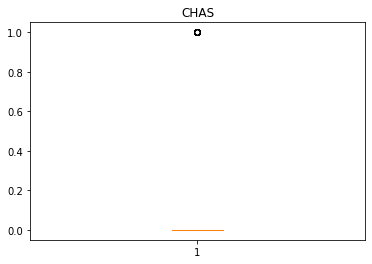

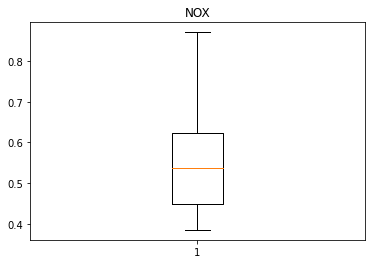

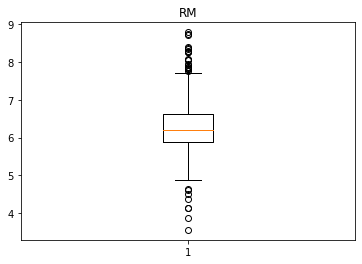

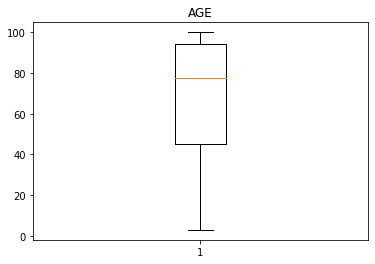

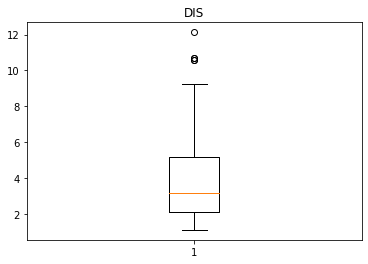

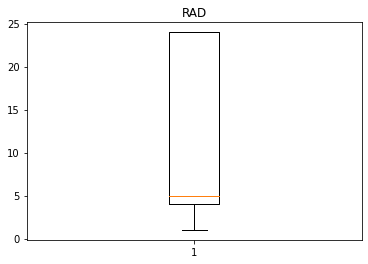

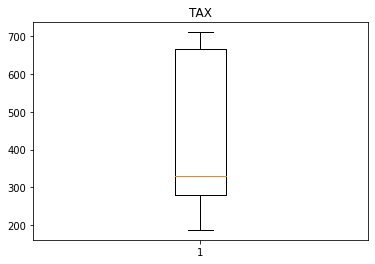

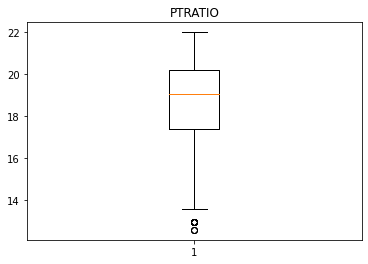

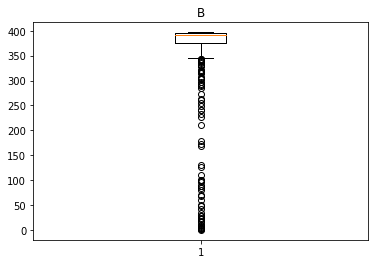

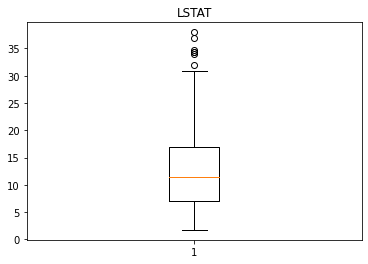

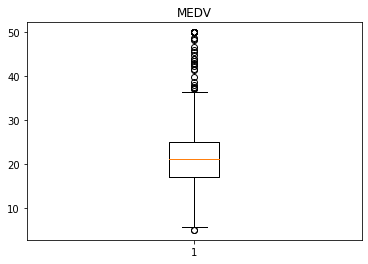

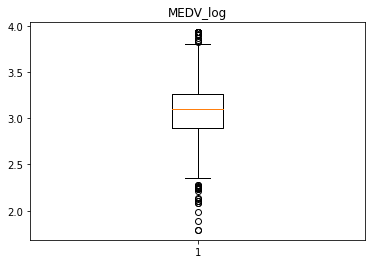

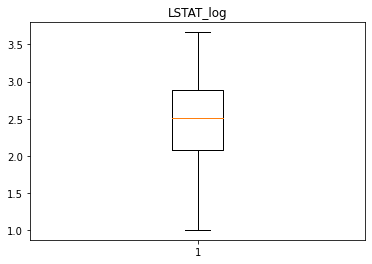

In [ ]:
for col in all_df._get_numeric_data():
  fig=plt.figure()
  plt.boxplot(all_df[col])
  plt.title(col)

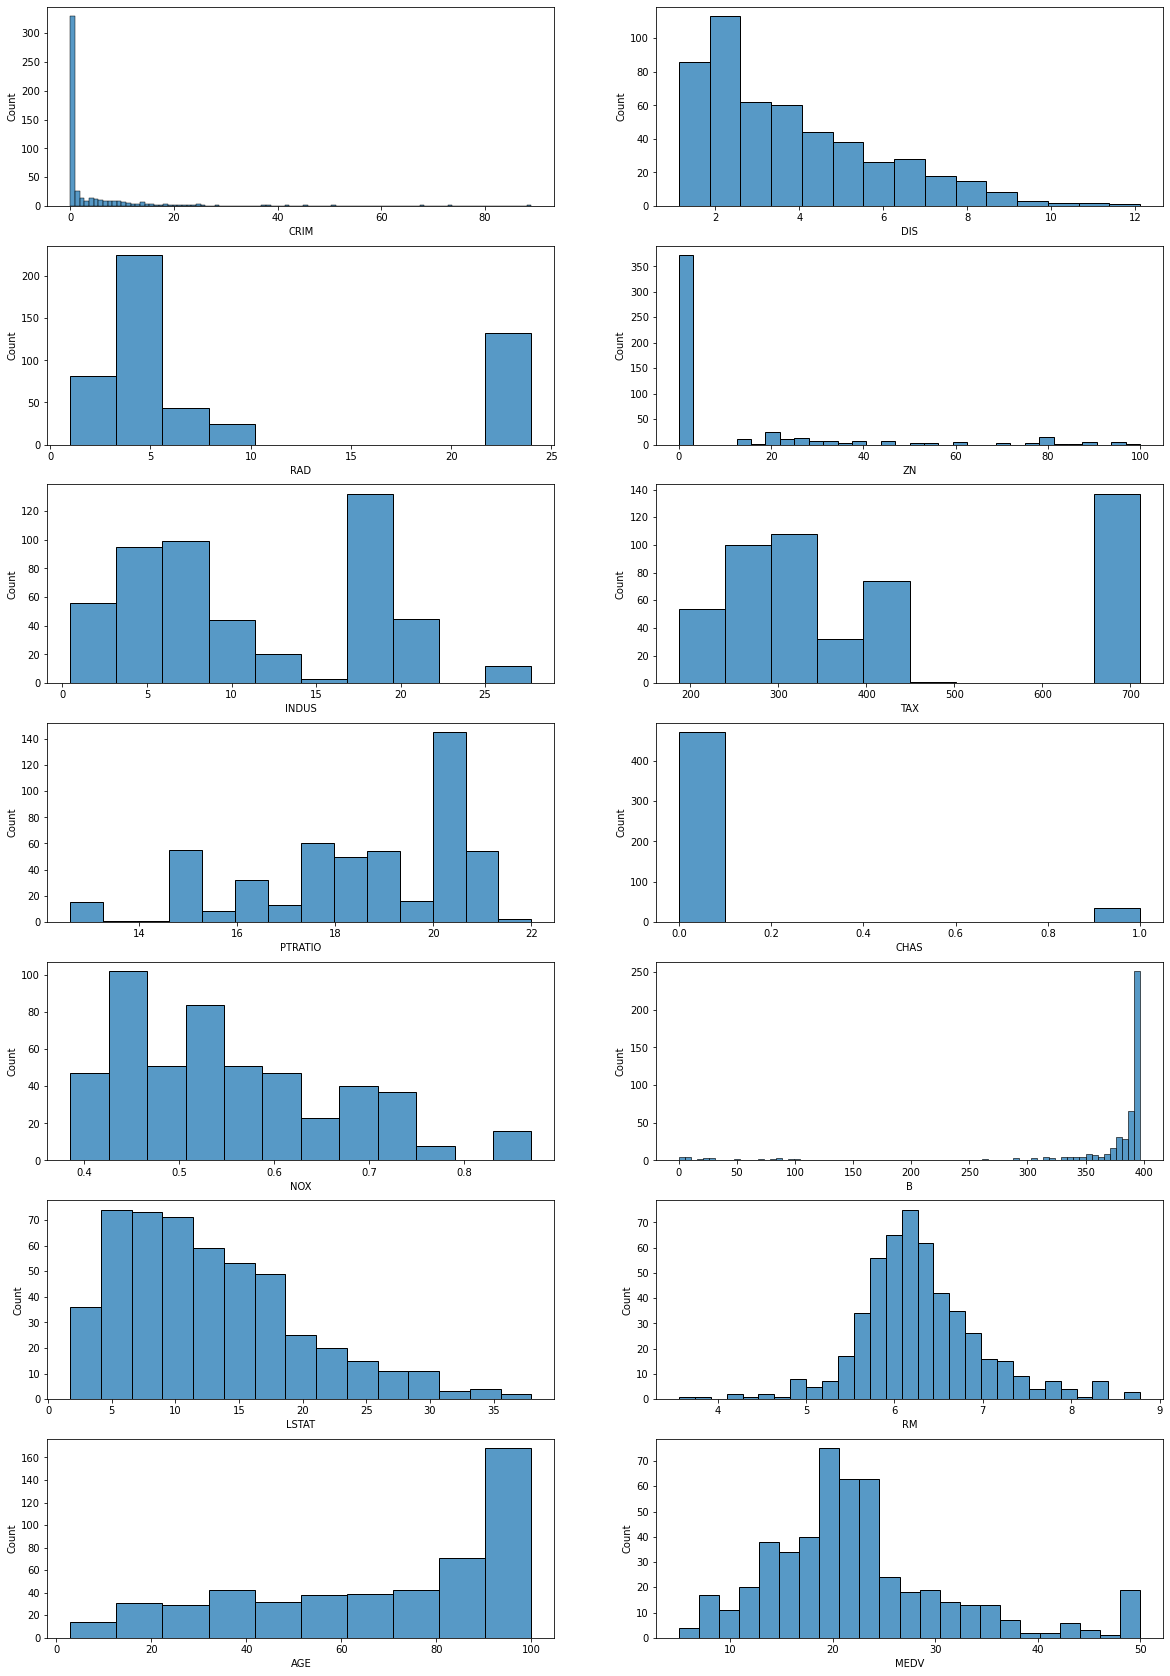

In [ ]:
fig,axs=plt.subplots(nrows=7,ncols=2,figsize=(20,30))

for i,feature in enumerate(all_df.columns):
  sns.histplot(x=all_df[feature],ax=axs[i%7][i%2])

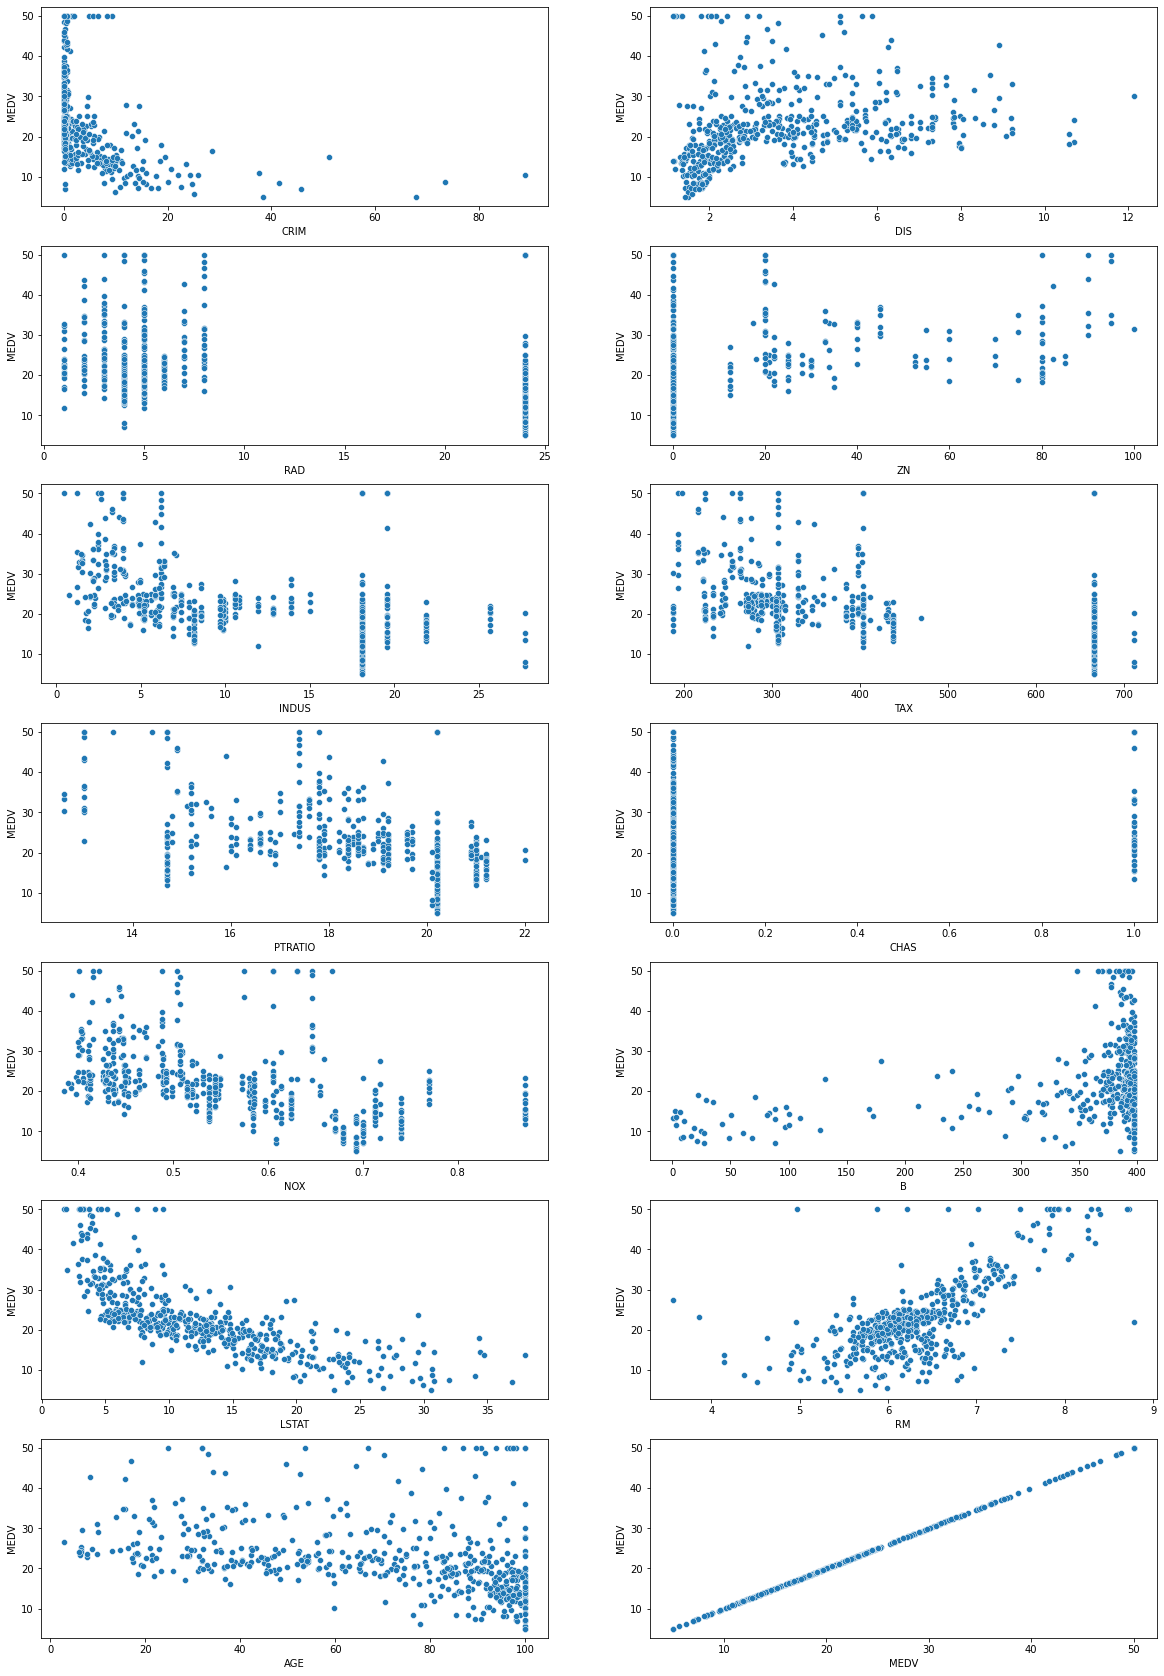

In [ ]:
fig,axs=plt.subplots(nrows=7,ncols=2,figsize=(20,30))

for i,feature in enumerate(all_df.columns):
  sns.scatterplot(x=all_df[feature],y=all_df['MEDV'],ax=axs[i%7][i%2])

In [ ]:
all_df_corr=all_df.corr().unstack().sort_values(kind='quicksort',ascending=False).reset_index()
all_df_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Coefficient'},inplace=1)

In [ ]:
all_df_corr[all_df_corr['Feature 2']=='MEDV']

,Feature 1,Feature 2,Coefficient
0,MEDV,MEDV,1.000000
23,RM,MEDV,0.695360
67,ZN,MEDV,0.360445
70,B,MEDV,0.333461
80,DIS,MEDV,0.249929
89,CHAS,MEDV,0.175260
145,AGE,MEDV,-0.376955
150,RAD,MEDV,-0.381626
154,CRIM,MEDV,-0.388305
163,NOX,MEDV,-0.427321


In [ ]:
all_df_corr[(~(all_df_corr['Coefficient']==1.0)&(abs(all_df_corr['Coefficient'])>0.5))]

,Feature 1,Feature 2,Coefficient
14,TAX,RAD,0.910228
15,RAD,TAX,0.910228
16,INDUS,NOX,0.763651
17,NOX,INDUS,0.763651
18,NOX,AGE,0.731470
19,AGE,NOX,0.731470
20,TAX,INDUS,0.720760
21,INDUS,TAX,0.720760
22,MEDV,RM,0.695360
23,RM,MEDV,0.695360


In [ ]:
medv_labels=['First','Second','Third','Fourth']
all_df['MEDV_bin']=pd.qcut(all_df['MEDV'],4,labels=medv_labels)

all_df['MEDV_log']=np.log(all_df['MEDV']+1)
all_df['MEDV_log_bin']=pd.qcut(all_df['MEDV_log'],4,labels=medv_labels)

print('MEDV skewness',all_df['MEDV'].skew())
print('MEDV log skewness',all_df['MEDV_log'].skew())

MEDV skewness 1.1080984082549072
MEDV log skewness -0.2412435236076337


In [ ]:
all_df['LSTAT_log']=np.log(all_df['LSTAT']+1)
print('LSTAT skewness',all_df['LSTAT'].skew())
print('LSTAT log skewness',all_df['LSTAT_log'].skew())

LSTAT skewness 0.9064600935915367
LSTAT log skewness -0.18719503273600827


In [ ]:
lstat_labels=['First','Second','Third','Fourth']
all_df['LSTAT_log_bin']=pd.qcut(all_df['LSTAT_log'],4,labels=lstat_labels)

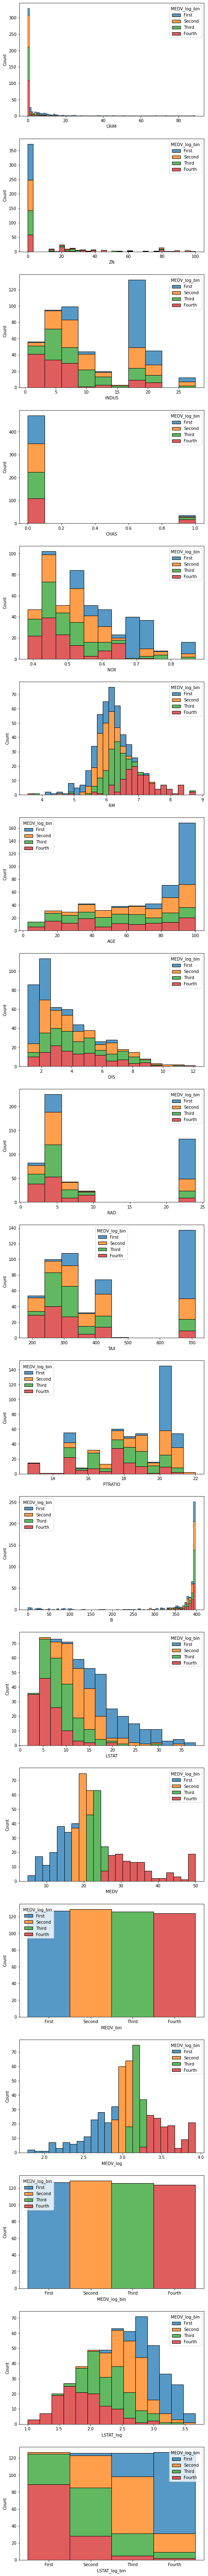

In [ ]:
nrows=len(all_df.columns)
fig_width=nrows*6
fig,axs=plt.subplots(nrows=nrows,figsize=(8,fig_width))

for i,feature in enumerate(all_df.columns):
  sns.histplot(x=all_df[feature],hue=all_df['MEDV_log_bin'],multiple='stack',ax=axs[i])

In [ ]:
all_df.groupby(['LSTAT_log_bin','MEDV_log_bin']).mean()

CRIM         ZN  ...  MEDV_log  LSTAT_log
LSTAT_log_bin MEDV_log_bin                        ...                     
First         First               NaN        NaN  ...       NaN        NaN
              Second         0.071985  40.000000  ...  3.075003   1.965103
              Third          0.280735  24.888889  ...  3.202611   1.920857
              Fourth         0.423361  30.264045  ...  3.605600   1.688648
Second        First         17.069397   0.000000  ...  2.730672   2.286202
              Second         0.495038  11.671053  ...  3.031470   2.349470
              Third          0.710032  11.657895  ...  3.186191   2.301093
              Fourth         1.047341  15.982143  ...  3.499415   2.249779
Third         First          6.716542   0.892857  ...  2.747467   2.764680
              Second         1.562844   5.268657  ...  3.011746   2.693411
              Third          2.478260   2.115385  ...  3.158191   2.659259
              Fourth         3.505448   4.000000  ...  3.395843   2.645831
Fourth        First         12.041421   0.260417  ...  2.541576   3.167080
              Second         4.031586   1.568182  ...  2.969468   3.065721
              Third          0.958063   0.000000  ...  3.155802   3.032999
              Fourth         7.291425   6.250000  ...  3.342837   3.018598

[16 rows x 16 columns]

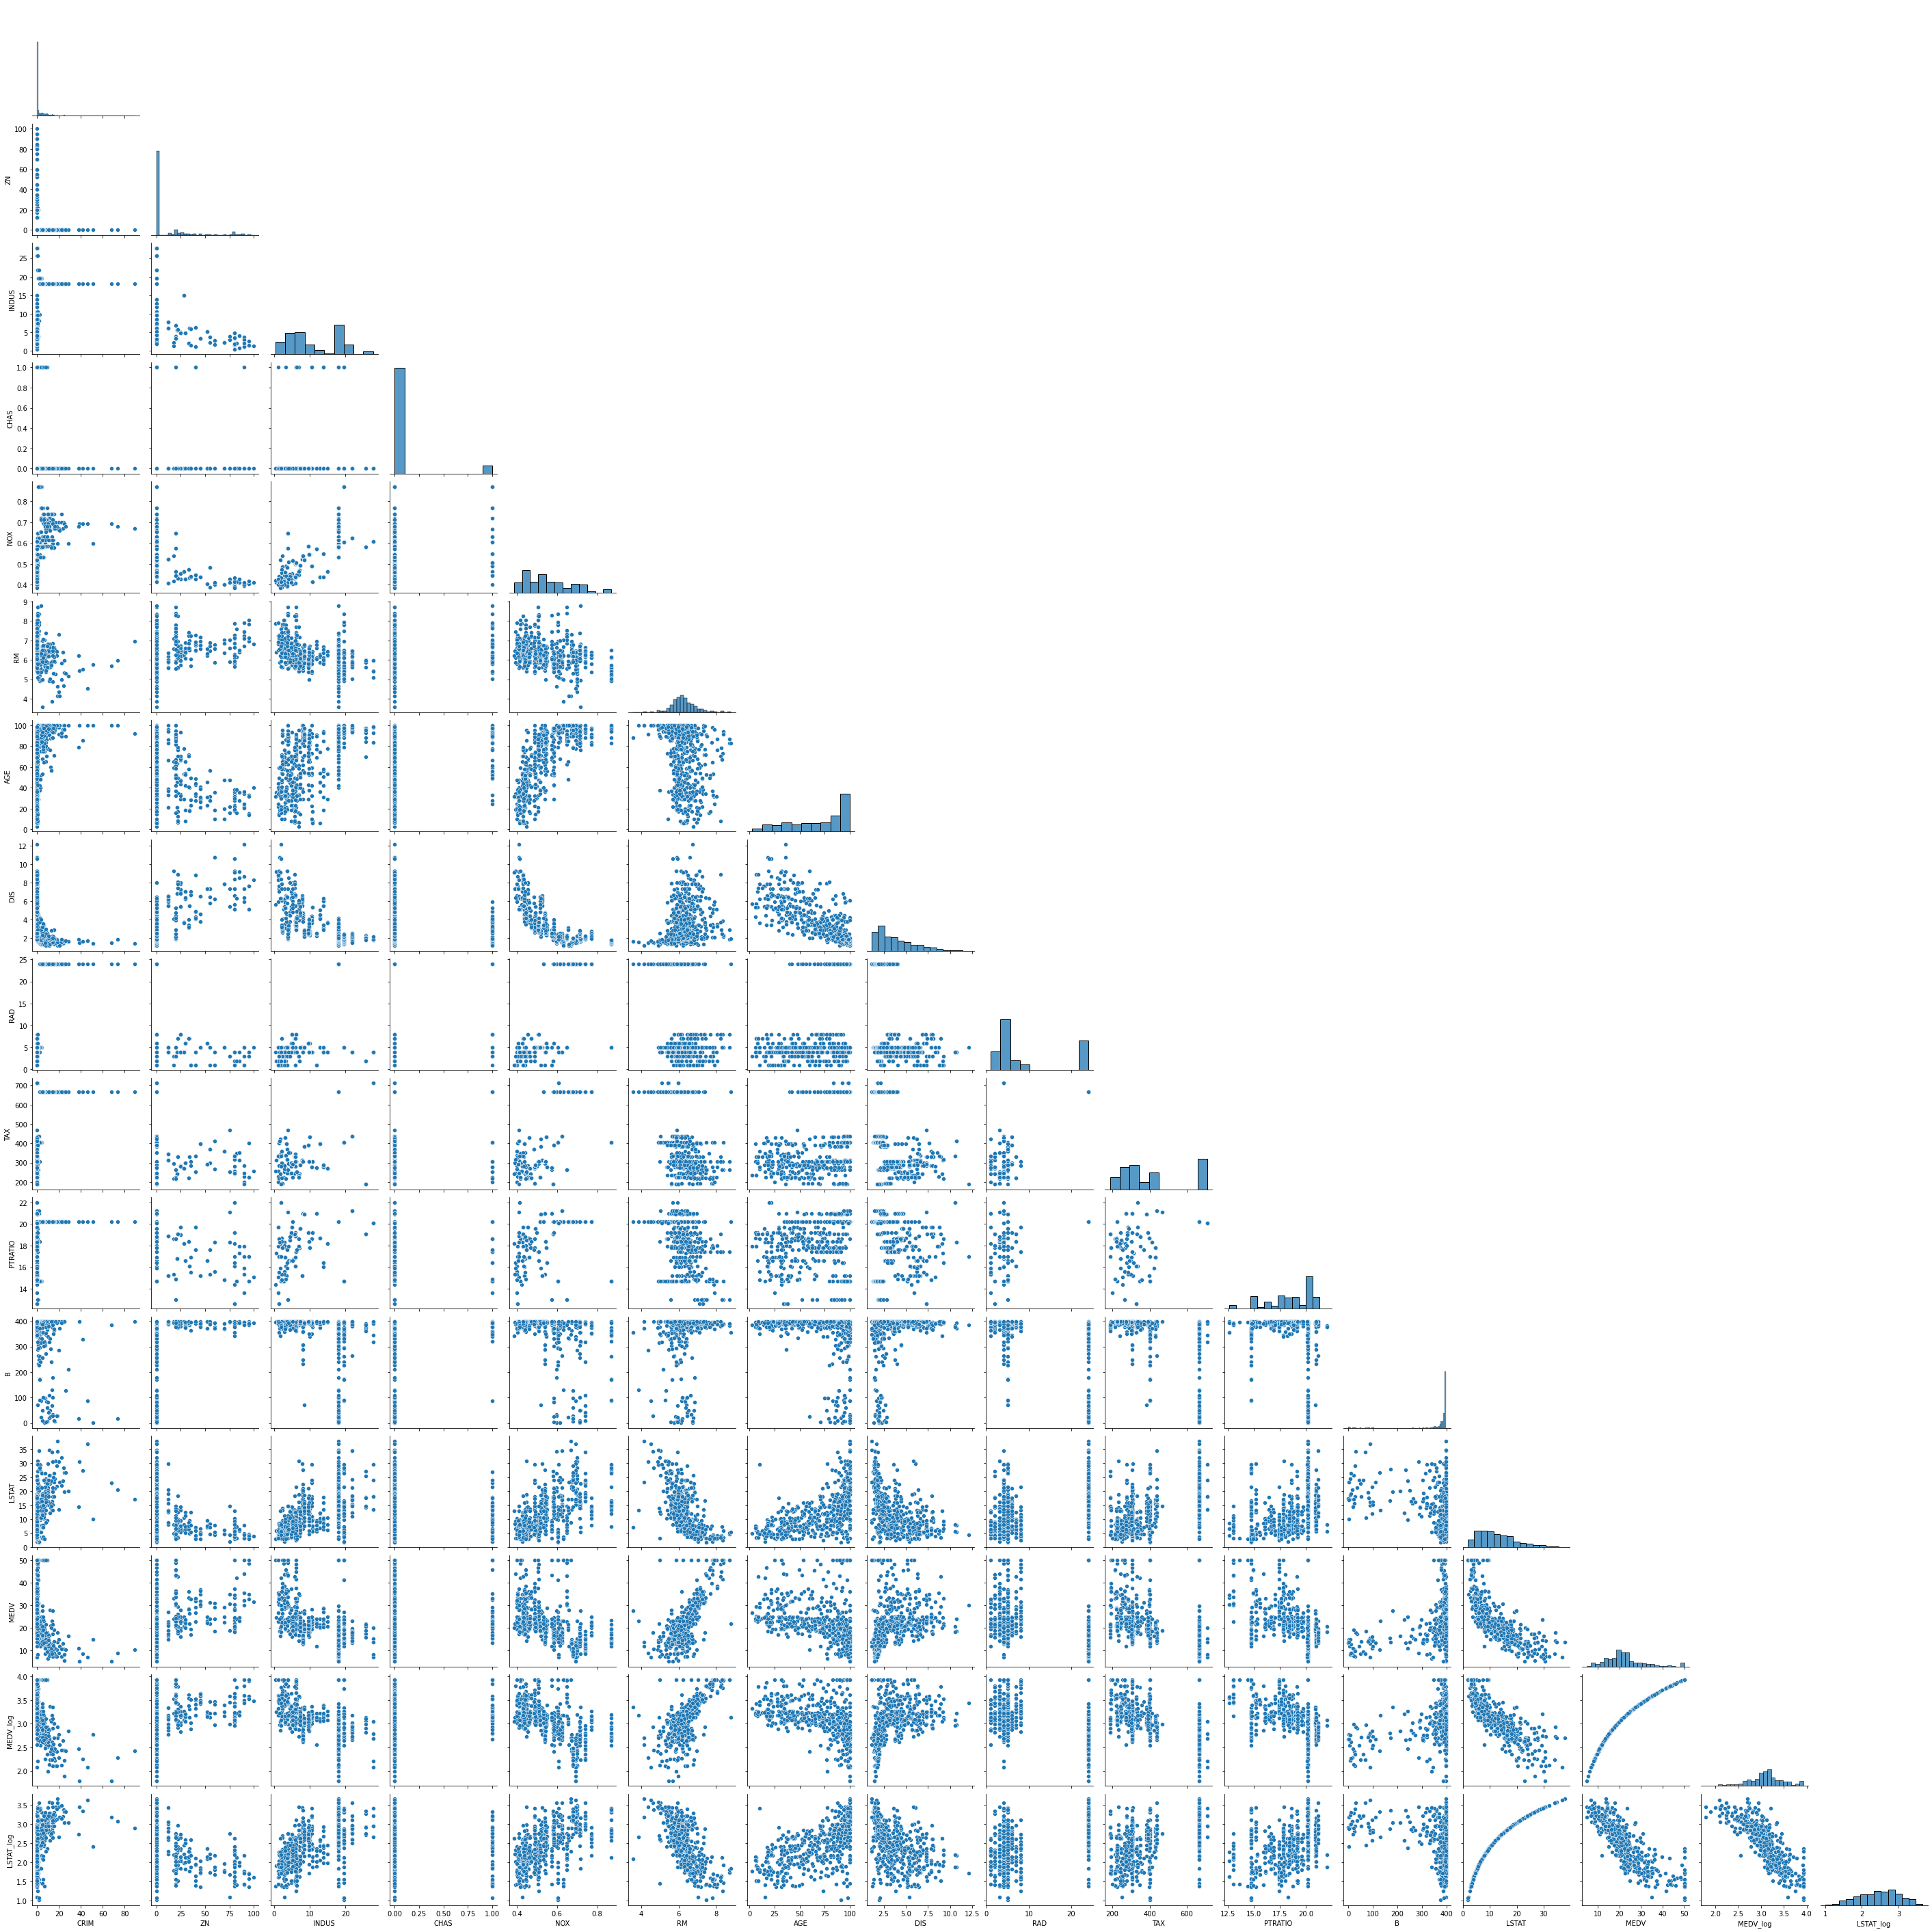

In [ ]:
sns.pairplot(all_df,corner=1)

In [ ]:
all_df['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [ ]:
all_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_log,LSTAT_log
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,3.085437,2.475610
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.386966,0.539033
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.791759,1.004302
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,2.891757,2.073162
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,3.100092,2.514464
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,3.258097,2.887869
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,3.931826,3.662792


In [34]:
all_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_bin,MEDV_log,MEDV_log_bin,LSTAT_log,LSTAT_log_bin
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Third,3.218876,Third,1.788421,First
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Third,3.117950,Third,2.316488,Second
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Fourth,3.575151,Fourth,1.615420,First
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Fourth,3.538057,Fourth,1.371181,First
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Fourth,3.616309,Fourth,1.845300,First
